1. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

2.Load the California Housing dataset

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

3.Initial Exploration

In [ ]:
print("Dataset Head:")
print(df.head())
print("\nDataset Structure:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Head:


NameError: name 'df' is not defined

4.visulation-correlation matrix

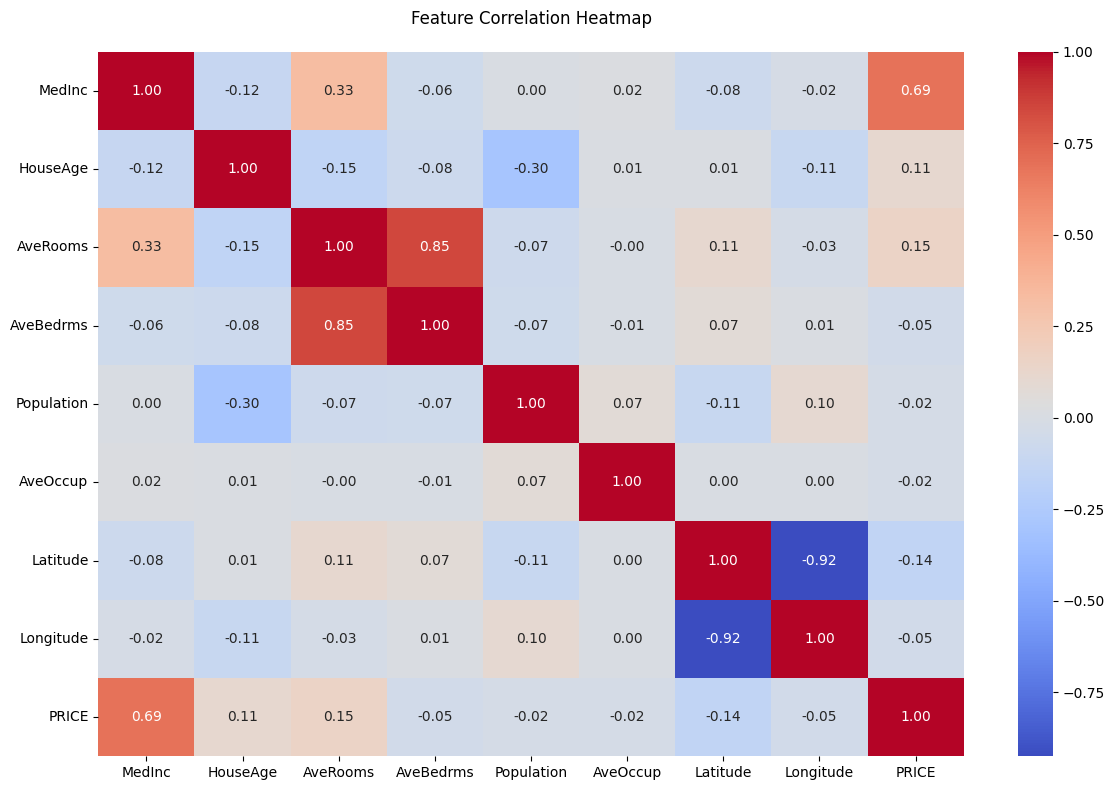

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

5.visulation- pairplot

<Figure size 1000x800 with 0 Axes>

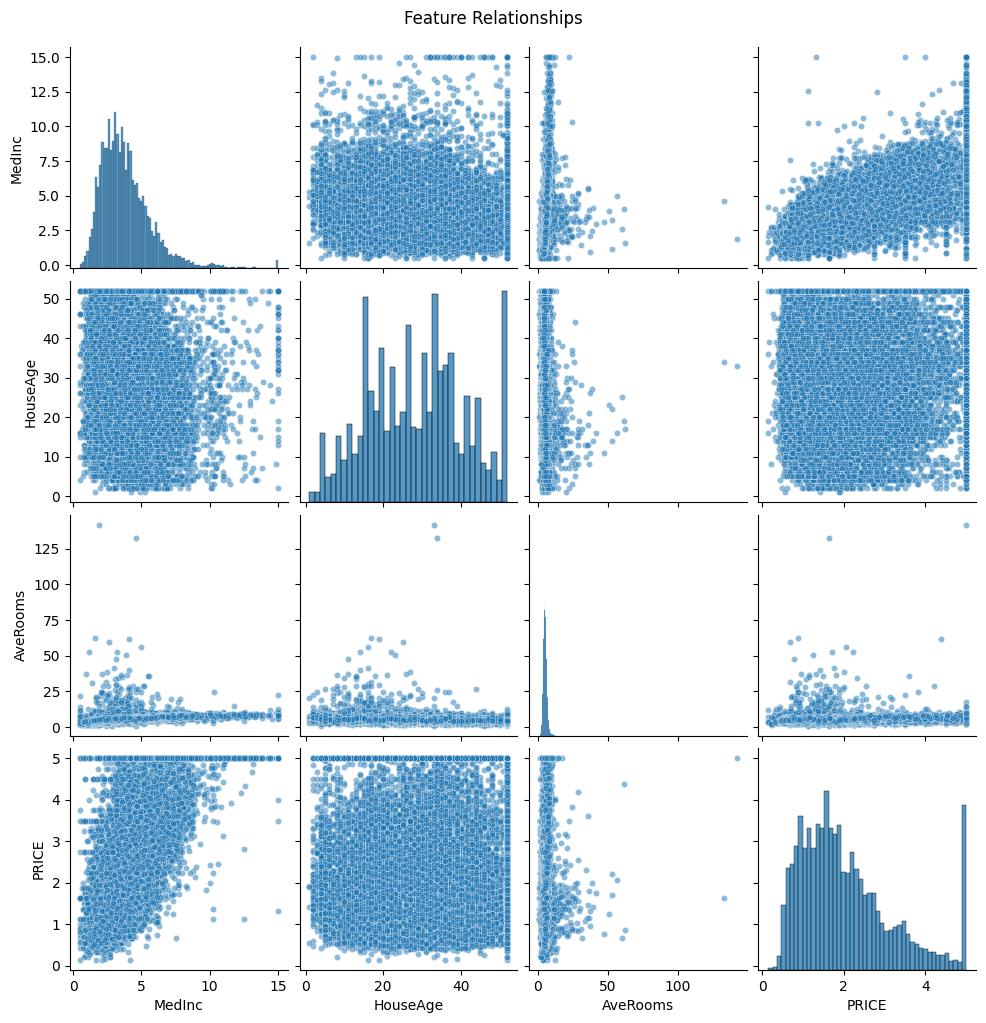

In [ ]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'PRICE']
plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_features], plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

6.Data preparation

In [ ]:
# Split into features (X) and target (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 16512
Test samples: 4128


7.Model traning

In [ ]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")

Model trained successfully.
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02


8.Model Evaluation

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nEvaluation Metrics:")
print(f"- MSE: {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")


Evaluation Metrics:
- MSE: 0.5559
- RMSE: 0.7456
- R²: 0.5758


9.Prediction visulation

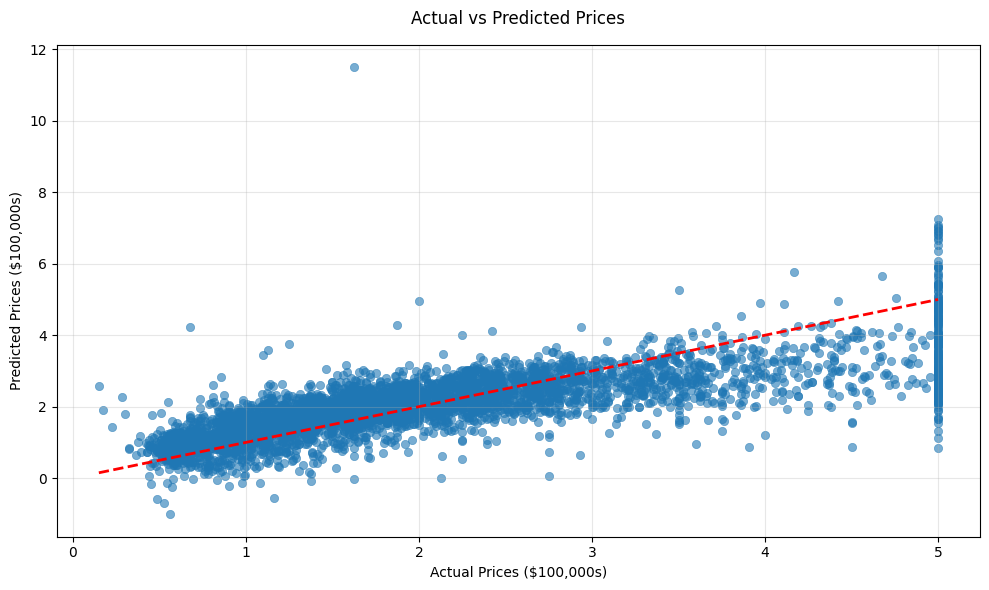

In [ ]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Prices", pad=15)
plt.xlabel("Actual Prices ($100,000s)")
plt.ylabel("Predicted Prices ($100,000s)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()